# 4. Linear Algebra

- Linear algebra is the branch of mathematics that deals with vector spaces. 
- It underpins a large number of data science concepts and techniques


In [3]:
import re, math, random # regexes, math functions, random numbers 
import matplotlib.pyplot as plt # pyplot 
from collections import defaultdict, Counter
from functools import partial, reduce

# Vectors
- Vectors are points in some finite-dimensional space.
- Think of your data as vectors 
- A good way to represent numeric data                   

- three-dimensional vectors (height, weight, age)
- student grades as four-dimensional vectors (exam1, exam2, exam3, exam4)
- A list of three numbers corresponds to a vector in three-dimensional space

    ``` 
    height_weight_age = [70,  # inches,                     
                         170, # pounds,                     
                         40 ] # years 
                         
    grades = [95,   # exam1          
              80,   # exam2      
              75,   # exam3    
              62 ]  # exam4 
    ```

vector 방향과 크기를 가지고 있다.

### Arithmetic on vectors 
- We will define vector operations 
- Imagine these python codes as mathematical defintions for explanation 
- Lists are terrible in performance 
- Must use numpy arrays in real applications with large data

#### Adding two vectors

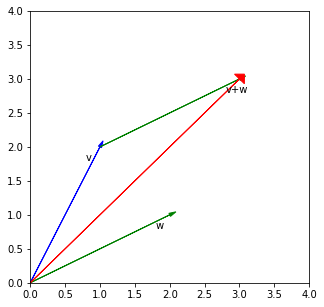

In [4]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.axis([0,4,0,4])

v = np.array([1,2])
w = np.array([2,1])
plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, fc='b', ec='b') 
plt.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(v[0], v[1], w[0], w[1], head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(0, 0, v[0]+w[0], v[1]+w[1], head_width=0.20, head_length=0.1, fc='r', ec='r') 
offset=np.array([-0.2,-0.2]) 
plt.annotate('v', xy=v+offset)
plt.annotate('w', xy=w+offset)
plt.annotate('v+w', xy=v+w+offset) 
plt.show()

blue : v  
green : w     
red : v+w

In [5]:
def vector_add(v, w):    
    """adds two vectors componentwise""" 
    return [v_i + w_i for v_i, w_i in zip(v,w)]

하나씩 보겠다 x, y

- Adding two vectors
<img src = "img/vector_add.png" width=400>

In [6]:
def vector_subtract(v, w): 
    """subtracts two vectors componentwise"""  
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):               #vector_add 메소드를 vectors에 적용!
    return reduce(vector_add, vectors) 

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):              # centroid , vectors의 mean
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""  
    n = len(vectors)  
    return scalar_multiply(1/n, vector_sum(vectors))


In [7]:
# numpy version 
import numpy as np

u = np.array([1,1,1]) 
v = np.array([1,0,0])
w = np.array([0,1,0]) 
print(v + w)                       # vector_add 
print(v - w)                       # vector_subtract
vs = np.array([u ,v, w])           # vectors 
print(np.sum(vs, axis=0))          # vector_sum 
print(10 * v)                      # scalar_multiply
print(np.mean(vs, axis=0))         # vector_mean

[1 1 0]
[ 1 -1  0]
[2 2 1]
[10  0  0]
[0.66666667 0.66666667 0.33333333]


In [1]:
def dot(v, w):   
    """v_1 * w_1 + ... + v_n * w_n"""                      #(v1, ... ,v) (w1, .....,w ) = v1*w1 ...
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):                                     #자기와 자기 자신
    """v_1 * v_1 + ... + v_n * v_n"""    
    return dot(v, v)

def magnitude(v):                                          
    return math.sqrt(sum_of_squares(v))

**numpy version**

In [8]:
# v = np.array([1,0,0])
w = np.array([0,1,0]) 

print(np.dot(v,w))            # dot 
print(v.dot(w))               # dot 

print(np.dot(v,v))            # sum_of_squares

print(np.sqrt(np.dot(v,v)))   # magnitude
print(np.linalg.norm(v))      # magnitude

0
0
1
1.0
1.0


맨하탄np.sum(np.abs(v-w))??

*Dot product as vector projectio*
- v's projection on 𝐰: 𝐯1

$$𝐯_1 = { 𝐯 *𝐰 \over \vert 𝐰 \vert} \times { 𝐰 \over \vert 𝐰 \vert} = { 𝐯 *𝐰 \over \vert 𝐰 \vert^2}𝐰$$

cosin distance, 프로젝션 공식 유도 ** 앞으로 많이 쓸 예정

In [12]:
def squared_distance(v, w):   
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):   
    return math.sqrt(squared_distance(v, w))

def manhattan_distance(v, w):   
    return sum(math.fabs(v_i - w_i) for v_i, w_i in zip(v, w))

In [13]:
def cosine_similarity(v, w):   
    return dot(v, w) / (magnitude(v) * magnitude(w))

v = [0,1,1,0] 
w = [0,100,100,0]
u = [1,0,0,1] 
y = [-1,0,0,-1]

print(cosine_similarity(v, w)) 
print(cosine_similarity(u, v)) 
print(cosine_similarity(u,y))

0.9999999999999999
0.0
-0.9999999999999998


In [14]:
import numpy as np 
v = np.array([1,1]) 
w = np.array([10,10])

print(np.dot(v - w, v - w))            # squared_distance 
print(np.sqrt(np.dot(v - w, v - w)))   # (euclidean) distance
print(np.sum(np.fabs(v - w)))        # manhattan_distance 
print(np.dot(v,w) / (np.sqrt(np.dot(v,v)) * np.sqrt(np.dot(w,w))))   # cosine sim

162
12.727922061357855
18.0
0.9999999999999998


fabs  # 절대값

- Since all componetns are nonnegative in document vectors, cosine similarity is between 0 and 1,
cosine_distance is

```
    cosine_distance(v, w) = 1 - cosine_similarity(v, w)
```


In [17]:
def cosine_distance(v, w):    
    return 1 - cosine_similarity(v, w)

## Matrices
- Matrix is a two-dimensional collection of numbers.
- We will represent matrices as list s of list s
- If A is a matrix, then A[i][j] is the element in the ith row and the jth column.

```
    A = [[1, 2, 3],
        [4, 5, 6]] # A has 2 rows and 3 columns 

    B = [[1, 2],  
        [3, 4],  
        [5, 6]] # B has 3 rows and 2 columns
```
- if you had the heights, weights, and ages of 1,000 people, you could put them in a matrix:

```
    data = [[70, 170, 40],       
            [65, 120, 26],    
            [77, 250, 19],     
            # ....     
            ]
```

In [22]:
# 
# functions for working with matrices 
#

def shape(A):   
    num_rows = len(A)  
    num_cols = len(A[0]) if A else 0 
    return num_rows, num_cols

def get_row(A, i):  
    return A[i]

def get_column(A, j):   
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn): 
    """returns a num_rows x num_cols matrix   
    whose (i,j)-th entry is entry_fn(i, j)"""    
    return [[entry_fn(i, j) for j in range(num_cols)]     
            for i in range(num_rows)]

def is_diagonal(i, j):  
    """1's on the 'diagonal', 0's everywhere else"""  
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

import random 
random_matrix = make_matrix(5, 5, lambda i, j: random.choice([0,1]))
random_matrix

[[0, 0, 0, 1, 1],
 [1, 0, 1, 1, 0],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 1, 1],
 [1, 1, 1, 0, 0]]

#### numpy version 

In [19]:
A = np.array([[1, 2, 3],          
              [4, 5, 6]])

B = np.array([[1, 2],      
              [3, 4],      
              [5, 6]])

In [21]:
A.shape    # shape 
A[1,:]     # get_row
A[:,1]     # get_column 
np.eye(5,5) # identity_matrix

# 5 x 5 matrix with random selection of [0,1]
np.array([np.random.choice([0,1]) for _ in np.arange(25)]).reshape(5,5) 
np.vectorize(np.int)(np.random.rand(25) >= 0.5).reshape(5,5)

array([[1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0]])

#### Two representations for friendships 
- Representation in Chapter 1

In [24]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),     
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

- Alternative notation

In [25]:
#          user 0  1  2  3  4  5  6  7  8  9 #
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0    
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1      
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2      
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3      
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4         
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5         
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6        
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7       
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8       
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9


이것 처럼 별로 없으면 위에 처럼 해라

adjacency matrix

In [26]:
friendships[0][2] == 1     # True, 0 and 2 are friends 
friendships[0][8] == 1     # False, 0 and 8 are not friend

False

In [28]:
friends_of_five = [i                                              # only need 
                   for i, is_friend in enumerate(friendships[5])  # to look at   
                   if is_friend]                                  # one row

print(friends_of_five)

[4, 6, 7]


### numpy version

In [30]:
friendships = np.array(friendships) 
friendships[0, 2] == 1             # True, 0 and 2 are friends 
friendships[0, 8] == 1             # False, 0 and 8 are not friends 
np.argwhere(friendships[5] == 1)   # friends_of_five

array([[4],
       [6],
       [7]], dtype=int64)

### matrix addition

In [32]:
# matrix addition
def matrix_add(A, B):   
    if shape(A) != shape(B):       
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)    
    def entry_fn(i, j): return A[i][j] + B[i][j]
    
    return make_matrix(num_rows, num_cols, entry_fn)

### numpy version

In [51]:
import numpy as np
A = np.array([[1,1],[2,2]]) 
print(A,"\nA\n")
B = np.array([[3,3],[4,4]]) 
print(B,"\nB\n")
print(A + B)     # numpy version 
print("A + B\n")     # numpy version 
print(A * B)  
print("A * B\n")  
print(np.transpose(A))              # transpose 
print("np.transpose(A)\n")
print(A.T) 
print("A.T\n") 
print(A.dot(B))                     # matrix multiplication 
print("A.dot(B)\n")                     
print(np.matmul(A,B)) 
print("np.matmul(A,B)\n") 
C = np.array([[1., 2.], [3., 4.]]) 
print(C,'\nC\n')
print(np.linalg.det(C))             # determinant 행렬식
print(np.linalg.inv(C))             # inverse 역행력
print(C.dot(np.linalg.inv(C))) #내적
print("C.dot(np.linalg.inv(C))\n")
print(np.linalg.eig(C))#고유값, 고유벡터
print("np.linalg.eig(C)고유값, 고유벡터")

[[1 1]
 [2 2]] 
A

[[3 3]
 [4 4]] 
B

[[4 4]
 [6 6]]
A + B

[[3 3]
 [8 8]]
A * B

[[1 2]
 [1 2]]
np.transpose(A)

[[1 2]
 [1 2]]
A.T

[[ 7  7]
 [14 14]]
A.dot(B)

[[ 7  7]
 [14 14]]
np.matmul(A,B)

[[1. 2.]
 [3. 4.]] 
C

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]
C.dot(np.linalg.inv(C))

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))
np.linalg.eig(C)고유값, 고유벡터


---
- 고유벡터 : 선형 변화이 변환이 일어난 후에도 방향이 변하지 않는, 영벡터가 아닌 벡터

# More on types of attributes 
There are different types of attributes
- Nominal  # 학번 연산의 의미가 아니다 only 같다 아니다
    - Examples: ID numbers, eye color, zip codes
- Ordinal # 정렬 순서, 매운정도
    - Examples: rankings (e.g., taste of potato chips on a scale from 1-10), grades, height {tall, medium, short} 
- Interval # 간격, 구간, 온도 10도 20도 두배 더운게 아니다
    - Examples: calendar dates, temperatures in Celsius or Fahrenheit. 
- Ratio   #비율, 비
    - Examples: temperature in Kelvin, length, time, counts

*** 이중에서 vector화 할수 있는건 오직 ratio +,- * / 다 할 수 있는 ***

# Properties of Attribute Values

- The type of an attribute depends on which of the following properties/operations it possesses: 
    - Distinctness: = 
    - Order: < > 
    - Differences: + -
    - Ratios: * / 
- Nominal attribute: distinctness 
- Ordinal attribute: distinctness & order 
- Interval attribute: distinctness, order & meaningful differences 
- Ratio attribute: all 4 properties/operations # 성질

통계 statistic
6확률 가설 검정

gradint로 넘어간다